## Aim - Build a Collaborative Filtering-Based Book Recommender System.

### What is Collaborative Filtering?

Collaborative filtering is a technique used in recommendation systems to predict a user's preferences or interests by leveraging information from the preferences and behaviors of a group of users. The fundamental idea behind collaborative filtering is that users who have agreed in the past tend to agree in the future. This approach assumes that if a user A has similar preferences to another user B on certain items, A is likely to share preferences with B on additional items.

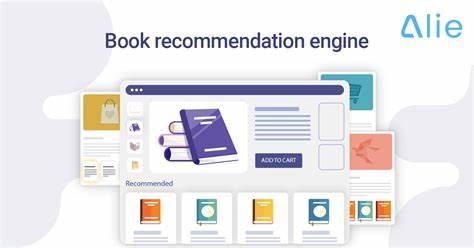

In [112]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
import os
os.chdir('C:\\Users\\zainu\\downloads\\Book_Recommender_System')

In [60]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

#### Import first dataset (contains books data)

In [61]:
books_raw = pd.read_csv("BX-Books.csv", sep = ';', error_bad_lines = False, encoding = 'latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [62]:
books = books_raw.copy()

In [63]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [64]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

### Description of variables

**ISBN:** International Standard Book Number, a unique identifier for books.

**Book-Title:** The title of the book.

**Book-Author:** The author(s) of the book.

**Year-Of-Publication:** The year when the book was published.

**Publisher:** The publishing company or entity responsible for producing and distributing the book.

**Image-URL-S:** Small-sized URL link to an image of the book cover.

**Image-URL-M:** Medium-sized URL link to an image of the book cover.

**Image-URL-L:** Large-sized URL link to an image of the book cover.

In [65]:
book_1 = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

In [66]:
book_1.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### Rename the varaibles

In [67]:
book_2 = book_1.rename(columns = {'Book-Title': 'title', 'Book-Author' : 'author', 'Year-Of-Publication' : 'year', 'Publisher': 'publisher'})

In [68]:
book_2.head(2)

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


**Importing 2nd Dataset  (contains users data)**

In [69]:
Users_raw = pd.read_csv("BX-Users.csv", sep = ';', error_bad_lines = False, encoding = 'latin-1')

In [70]:
Users = Users_raw.copy()

In [71]:
Users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Description of the variables

**User-ID:** A unique identifier for each user in the dataset.

**Location:** The geographical location or address associated with the user.

**Age:** The age of the user.

In [72]:
# Rename the variables
user_1 = Users.rename(columns = {'User-ID' : 'user_id', 'Location': 'location', 'Age' : 'age'})

In [73]:
user_1.head(2)

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


**Imporitng 3rd dataset (contains Book ratings)**

In [74]:
book_rating_raw = pd.read_csv('BX-Book-Ratings.csv', sep = ';', error_bad_lines = False , encoding = 'latin-1')

In [75]:
book_rating = book_rating_raw.copy()

In [76]:
book_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Description of the variables

**User-ID:** A unique identifier for each user in the dataset.

**ISBN:** International Standard Book Number, a unique identifier for books.

**Book-Rating:** The rating given by a user to a particular book.

In [77]:
# Rename the variables
book_rating_1 = book_rating.rename(columns = {'User-ID': 'user_id', 'Book-Rating': 'rating'})

In [78]:
book_rating_1.head(2)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5


In [79]:
book_2.shape

(271360, 5)

**In our first dataset, which contains information related to books, there are 271,360 records and 5 variables.**

In [80]:
user_1.shape

(278858, 3)

**In our first dataset, which contains information related to Users, there are 278,858 records and 3 variables.**

In [81]:
book_rating_1.shape

(1149780, 3)

**In our first dataset, which contains information related to books rating, there are 1149,780 records and 3 variables.**

In [82]:
book_rating_1['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

**The user with the User-ID 11676 has rated the highest number of books, specifically 13,602.**

- We aim to identify users who have provided 200 or more ratings for our analysis.

In [83]:
x = book_rating_1['user_id'].value_counts() > 200

In [84]:
x[x].shape

(899,)

**A total of 899 users have rated a minimum of 200 books.**

In [85]:
# User_id of those users who has given 200+ ratings
y = x[x].index

In [86]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [87]:
# Retrieving the records of those 899 users from book_rating_1
ratings = book_rating_1[book_rating_1['user_id'].isin(y)]

In [88]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [89]:
ratings.shape

(526356, 3)

In [90]:
# Merging the 'ratings' and 'book_2' DataFrames based on the 'ISBN' column
ratings_with_books = ratings.merge(book_2, on = 'ISBN')

In [91]:
# Displaying the shape (number of rows and columns) of the merged DataFrame
ratings_with_books.shape

(487671, 7)

In [92]:
# Grouping the merged DataFrame 'ratings_with_books' by 'title' and counting the number of ratings for each book
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [93]:
number_rating.head(2)

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1


In [94]:
# Rename the rating variable
number_rating.rename(columns = {'rating' : 'number_of_rating'}, inplace = True)

In [95]:
number_rating.head(2)

,title,number_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1


In [96]:
# Merging the 'ratings_with_books' and 'number_rating' DataFrames based on the 'title' column
final_rating = ratings_with_books.merge(number_rating, on = 'title')

In [97]:
final_rating.shape

(487671, 8)

In [98]:
final_rating = final_rating[final_rating['number_of_rating'] >= 50]

In [99]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,number_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82


In [100]:
final_rating.shape

(61853, 8)

In [101]:
final_rating.drop_duplicates(['user_id', 'title'], inplace = True)

In [102]:
final_rating.shape

(59850, 8)

**Creating a pivot table from the 'final_rating' DataFrame. The pivot table is structured with users' ratings as values, book titles as rows, and user IDs as columns.**

In [103]:
book_pivot = final_rating.pivot_table(columns = 'user_id', index = 'title', values = 'rating')

In [104]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [105]:
# Filling missing values in the 'book_pivot' DataFrame with zeros
book_pivot.fillna(0,inplace=True)

In [106]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
# Calculating the cosine similarity scores between books based on the 'book_pivot' user-item matrix
similarity_scores = cosine_similarity(book_pivot)

**Cosine similarity is a measure of similarity between two non-zero vectors, and in this context, it measures the similarity between books based on the ratings given by users.**

In [108]:
similarity_scores.shape

(742, 742)

In [109]:
# create a recommend function that returns a list of recommended books with their titles and authors.

def recommend(book_name):
    # index fetch
    index = np.where(book_pivot.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = final_rating[final_rating['title'] == book_pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        item.extend(list(temp_df.drop_duplicates('title')['author'].values))
        
        
        data.append(item)
    
    return data

In [110]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)', 'J. K. Rowling'],
 ['Harry Potter and the Goblet of Fire (Book 4)', 'J. K. Rowling'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)", 'J. K. Rowling']]

In [111]:
book_pivot.index[545]

'The Dogs of Babel (Today Show Book Club #12)'

### Conclusion

The collaborative filtering-based book recommendation system has successfully provided recommendations for "Harry Potter and the Chamber of Secrets (Book 2)." The suggested books, such as "Harry Potter and the Prisoner of Azkaban (Book 3)," "Harry Potter and the Goblet of Fire (Book 4)," and others by J. K. Rowling, indicate a cohesive and meaningful recommendation pattern. This outcome suggests that the system is effectively leveraging user ratings to identify books with similar appeal. 

Further evaluation of user engagement, system performance metrics, and user feedback can enhance the overall understanding of the recommendation system's effectiveness and guide potential optimizations for an improved user experience.

<center>

# THANK YOU

</center>
